In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
url = "https://raw.githubusercontent.com/ViniciusHolanda001/datasets/refs/heads/main/basecompleta2025-01.csv"

df = pd.read_csv(url, sep=';')
# mostrar todas as colunas
pd.set_option('display.max_columns', None)
# tipos e tamanho de colunas e linhas
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(5000, 24)
Gestor                     object
Canal de Origem            object
Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Ano Abertura                int64
Mês Abertura                int64
Data Abertura              object
Data Resposta              object
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empresa           object
Respondida                 object
Situação                   object
Avaliação Reclamação       object
Nota do Consumidor        float64
Análise da Recusa          object
dtype: object
Gestor                       0
Canal de Origem              0
Região                       0
UF                           0
Cidade                       0
Sexo

In [85]:
# primeiros 5 elementos do dataset
df.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,Data Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa
0,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,SE,MG,Belo Horizonte,M,entre 61 a 70 anos,2024,11,01/11/2024,11/11/2024,Banco Master (antigo Banco Máxima),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Demais Seguros,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN
1,Secretaria Adjunta de Proteção e Defesa dos Di...,Plataforma Web,CO,MT,Cuiabá,M,entre 31 a 40 anos,2024,11,01/11/2024,11/11/2024,Cartões Itaú,"Bancos, Financeiras e Administradoras de Cartão",Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada avaliada,Não Resolvida,1.0,NaN
2,Secretaria Nacional do Consumidor,Plataforma Web,NE,SE,Aracaju,M,entre 21 a 30 anos,2024,11,01/11/2024,11/11/2024,BaneseCard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,"Cálculo de juros, saldo devedor (contestação, ...",Internet,S,S,Finalizada avaliada,Não Resolvida,5.0,NaN
3,Secretaria Nacional do Consumidor,Plataforma Web,CO,MS,Campo Grande,F,entre 61 a 70 anos,2024,11,01/11/2024,08/11/2024,BrasilCard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Atendimento / SAC,SAC - Dificuldade para cancelar o serviço,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,NaN
4,Instituto Municipal de Proteção e Defesa do Co...,Plataforma Web,SE,RJ,Rio de Janeiro,M,entre 41 a 50 anos,2024,11,01/11/2024,11/11/2024,Banco Bradesco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,Renegociação / parcelamento de dívida,Não comprei / contratei,N,S,Finalizada avaliada,Não Resolvida,3.0,NaN


In [86]:
# fazendo copia do dataset original para calcular tempo de resposta
df_limpo = df.copy()
df_limpo['Data Abertura'] = pd.to_datetime(df_limpo['Data Abertura'], format='%d/%m/%Y')
df_limpo['Data Resposta'] = pd.to_datetime(df_limpo['Data Resposta'], format='%d/%m/%Y')

df_limpo['Tempo Resposta'] = (df_limpo['Data Resposta'] - df_limpo['Data Abertura']).dt.days

# removendo colunas
remover_colunas = ['Gestor', 'Ano Abertura', 'Mês Abertura']

df_limpo = df_limpo.drop(columns=[col for col in remover_colunas if col in df_limpo.columns])
df_limpo.head()

,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Data Abertura,Data Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Tempo Resposta
0,Plataforma Web,SE,MG,Belo Horizonte,M,entre 61 a 70 anos,2024-11-01,2024-11-11,Banco Master (antigo Banco Máxima),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Demais Seguros,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,10.0
1,Plataforma Web,CO,MT,Cuiabá,M,entre 31 a 40 anos,2024-11-01,2024-11-11,Cartões Itaú,"Bancos, Financeiras e Administradoras de Cartão",Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada avaliada,Não Resolvida,1.0,NaN,10.0
2,Plataforma Web,NE,SE,Aracaju,M,entre 21 a 30 anos,2024-11-01,2024-11-11,BaneseCard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,"Cálculo de juros, saldo devedor (contestação, ...",Internet,S,S,Finalizada avaliada,Não Resolvida,5.0,NaN,10.0
3,Plataforma Web,CO,MS,Campo Grande,F,entre 61 a 70 anos,2024-11-01,2024-11-08,BrasilCard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Atendimento / SAC,SAC - Dificuldade para cancelar o serviço,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,NaN,7.0
4,Plataforma Web,SE,RJ,Rio de Janeiro,M,entre 41 a 50 anos,2024-11-01,2024-11-11,Banco Bradesco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,Renegociação / parcelamento de dívida,Não comprei / contratei,N,S,Finalizada avaliada,Não Resolvida,3.0,NaN,10.0


In [87]:
tempo_de_resposta = df_limpo['Tempo Resposta'].describe()
tempo_de_resposta

count    4576.000000
mean       10.755026
std         4.069784
min         0.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        40.000000
Name: Tempo Resposta, dtype: float64

In [88]:
# empresas com mais reclamações
empresas_mais_frequentes = df_limpo['Nome Fantasia'].value_counts().reset_index()

empresas_mais_frequentes.columns = ['Empresa', 'Quantidade Reclamações']

empresas_mais_frequentes.head(10)

,Empresa,Quantidade Reclamações
0,Facebook / Instagram,312
1,Banco Bradesco,222
2,Vivo - Telefônica,193
3,Banco Santander,186
4,Tim,167
5,Caixa Econômica Federal,136
6,Banco Bmg,123
7,Claro Residencial,120
8,Claro Celular,114
9,Amazon.com.br,109


In [89]:
#problemas mais frequentes
problemas_mais_frequentes = df_limpo['Problema'].value_counts().reset_index()

problemas_mais_frequentes.columns = ['Problema', 'Quantidade Reclamações']

problemas_mais_frequentes.head(10)

,Problema,Quantidade Reclamações
0,Cobrança indevida / abusiva para alterar ou ca...,337
1,Cobrança por serviço/produto não contratado / ...,290
2,Oferta não cumprida / serviço não fornecido/ v...,285
3,Dificuldade / atraso na devolução de valores p...,241
4,"Cobrança de tarifas, taxas, valores não previs...",203
5,"Cálculo de juros, saldo devedor (contestação, ...",202
6,SAC - Demanda não resolvida / não respondida /...,177
7,Renegociação / parcelamento de dívida,167
8,Não entrega do contrato ou documentação relaci...,160
9,Dificuldade de contato / demora no atendimento,158


In [90]:
# proporção de situação
situacao = df_limpo['Situação'].value_counts(normalize=True).reset_index()

situacao.columns = ['Situação', 'Porcentagem']
situacao['Porcentagem'] = situacao['Porcentagem'] * 100

situacao.head(10)

,Situação,Porcentagem
0,Finalizada não avaliada,91.92
1,Finalizada avaliada,7.74
2,Cancelada,0.34


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bancos, Financeiras e Administradoras de Cartão'),
  Text(1, 0, 'Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)'),
  Text(2, 0, 'Provedores de Conteúdo e Outros Serviços na Internet'),
  Text(3, 0, 'Comércio Eletrônico'),
  Text(4, 0, 'Transporte Aéreo')])

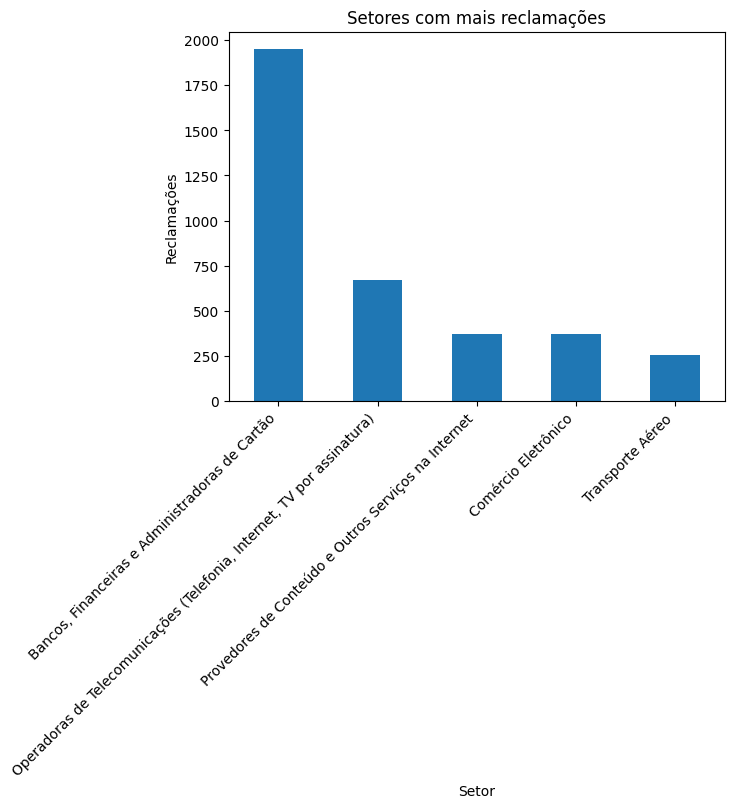

In [91]:
# setores com mais reclamações - gráfico
top_setores = df_limpo['Segmento de Mercado'].value_counts().head()
top_setores.plot(kind='bar')
plt.title("Setores com mais reclamações")
plt.xlabel('Setor')
plt.ylabel('Reclamações')
plt.xticks(rotation=45, ha='right')



Text(0, 0.5, 'Frequencia')

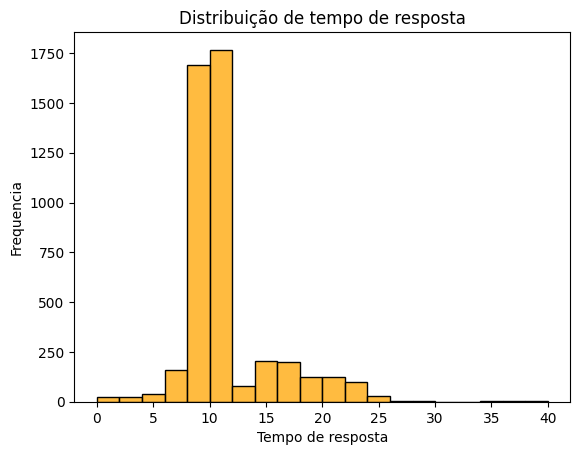

In [92]:
# tempo de resposta
sns.histplot(df_limpo['Tempo Resposta'].dropna(), bins=20, kde=False, color="orange")
plt.title("Distribuição de tempo de resposta")
plt.xlabel("Tempo de resposta")
plt.ylabel("Frequencia")


Text(0.5, 1.0, 'Distribuição de situação das reclamações')

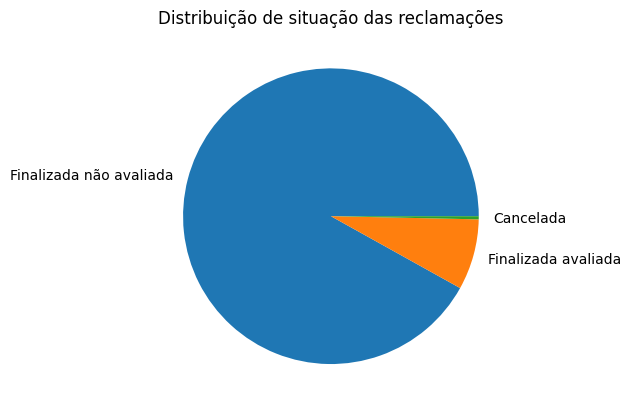

In [93]:
# grafico de pizza para situação das reclamações
situacao_plot = situacao.copy()
plt.pie(situacao_plot["Porcentagem"], labels=situacao_plot["Situação"])
plt.title("Distribuição de situação das reclamações")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'MG'),
  Text(1, 0, 'MT'),
  Text(2, 0, 'SE'),
  Text(3, 0, 'MS'),
  Text(4, 0, 'RJ'),
  Text(5, 0, 'SC'),
  Text(6, 0, 'PR'),
  Text(7, 0, 'BA'),
  Text(8, 0, 'CE'),
  Text(9, 0, 'ES'),
  Text(10, 0, 'SP'),
  Text(11, 0, 'RO'),
  Text(12, 0, 'GO'),
  Text(13, 0, 'AM'),
  Text(14, 0, 'DF'),
  Text(15, 0, 'PE'),
  Text(16, 0, 'PI'),
  Text(17, 0, 'MA'),
  Text(18, 0, 'PA'),
  Text(19, 0, 'RS'),
  Text(20, 0, 'AL'),
  Text(21, 0, 'TO'),
  Text(22, 0, 'AC'),
  Text(23, 0, 'RN'),
  Text(24, 0, 'PB'),
  Text(25, 0, 'AP'),
  Text(26, 0, 'RR')])

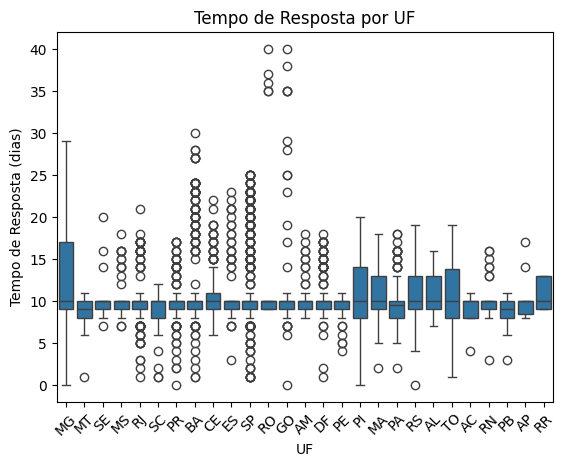

In [94]:
# boxplot de tempo de resposta por UF
ufs_filtradas = df_limpo.groupby('UF')["Tempo Resposta"].count()
ufs_filtradas = ufs_filtradas[ufs_filtradas >= 3].index.tolist()

df_filtrado = df_limpo[df_limpo['UF'].isin(ufs_filtradas)]
    
sns.boxplot(x='UF', y='Tempo Resposta', data=df_filtrado)
plt.title('Tempo de Resposta por UF')
plt.xlabel('UF')
plt.ylabel('Tempo de Resposta (dias)')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Facebook / Instagram'),
  Text(1, 0, 'Banco Bradesco'),
  Text(2, 0, 'Vivo - Telefônica'),
  Text(3, 0, 'Banco Santander'),
  Text(4, 0, 'Tim')])

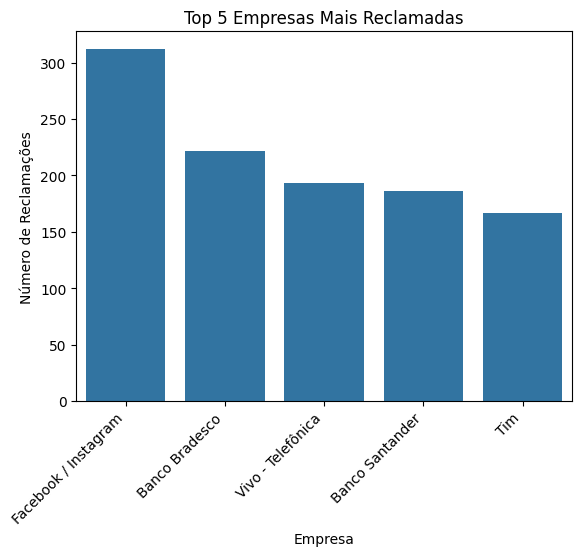

In [95]:
top5_empresas = empresas_mais_frequentes.head(5)
sns.barplot(x='Empresa', y='Quantidade Reclamações', data=top5_empresas)
plt.title('Top 5 Empresas Mais Reclamadas')
plt.xlabel('Empresa')
plt.ylabel('Número de Reclamações')
plt.xticks(rotation=45, ha='right')

In [96]:
# tempo médio de resposta das empresas
tempo_medio = df_limpo['Tempo Resposta'].mean()
print(tempo_medio)

10.755026223776223


In [97]:
# empresas com maior tempo de resposta
empresas_tempo = df_limpo.groupby('Nome Fantasia')['Tempo Resposta'].agg(['mean', 'count']).reset_index()
empresas_tempo = empresas_tempo[empresas_tempo['count'] >= 5]  # filtrando empresas com poucas reclamações
empresas_tempo = empresas_tempo.sort_values('mean', ascending=True)
empresas_tempo

,Nome Fantasia,mean,count
235,Hurb - Hotel Urbano,5.600000,5
389,Shopee Brasil,6.333333,15
394,Smiles,7.555556,9
111,Caixa Vida e Previdência,7.666667,6
338,Pefisa,7.800000,5
...,...,...,...
207,Facebook / Instagram,15.892157,306
54,Banco C6 Consignado (Banco Ficsa),16.203704,54
127,Casas Bahia,17.125000,8
52,Banco Bmg,18.000000,123


### Como podem ajudar um chatbot
Com as empresas sabendo qual o tipo mais frequente de reclamações, elas poderão implementar uma melhor resposta e contexto para os seus usuários, dando uma maior satisfação para ele.